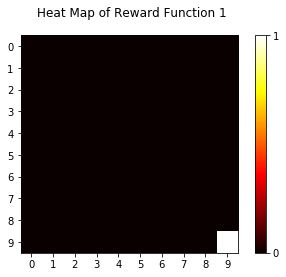

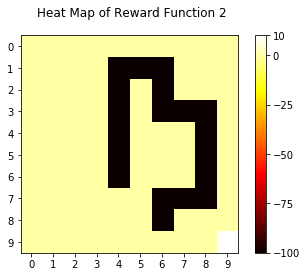

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from enum import Enum

# Question 1
reward_func_list_1 = [[0 for col in range(0, 10)] for row in range(0, 10)]
reward_func_list_1[9][9] = 1

reward_func_list_2 = [[0 for col in range(0, 10)] for row in range(0, 10)]
for row, col in [(1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4),
                 (1, 5),
                 (1, 6), (2, 6), (3, 6), (7, 6), (8, 6),
                 (3, 7), (7, 7),
                 (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]:
    reward_func_list_2[row][col] = -100
reward_func_list_2[9][9] = 10

plt.figure(0)
plt.suptitle("Heat Map of Reward Function 1")
heatmap_1 = plt.imshow(np.array(reward_func_list_1), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(heatmap_1, ticks=[0, 1])

plt.figure(1)
plt.suptitle("Heat Map of Reward Function 2")
heatmap_2 = plt.imshow(np.array(reward_func_list_2), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(heatmap_2, ticks=[-100, -75, -50, -25, 0, 10])
plt.show()

In [0]:
# Question 2
class RLState:
    pos = (None, None)
    def __init__(self, position):
        self.pos = position

class RLAction(Enum):
    UP = 0
    LEFT = 1
    DOWN = 2
    RIGHT = 3
    def __iter__(self):
        return self

def transition_prob(from_state, to_state, action, w):
    """
    Returns the probability of the navigator lands in to_state given its from_state and action with constant w
    """
    # Helper functions to check relative position between two States
    def onTop(to_state, from_state):
        return to_state.pos[0] == from_state.pos[0] - 1 and to_state.pos[1] == from_state.pos[1]
    
    def onBottom(to_state, from_state):
        return to_state.pos[0] == from_state.pos[0] + 1 and to_state.pos[1] == from_state.pos[1]

    def onLeft(to_state, from_state):
        return to_state.pos[0] == from_state.pos[0] and to_state.pos[1] == from_state.pos[1] - 1

    def onRight(to_state, from_state):
        return to_state.pos[0] == from_state.pos[0] and to_state.pos[1] == from_state.pos[1] + 1

    def onSame(to_state, from_state):
        return from_state == to_state
    
    from_row, from_col = from_state.pos

    # --------Case 1: four corners--------
    # top-left corner
    if from_row == 0 and from_col == 0:
        if onSame(to_state, from_state):
            return 1 - w + w/4 + w/4 if action == RLAction.UP or action == RLAction.LEFT else w/2
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        elif onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        else:
            return 0

    # bottom-left corner
    elif from_row == 9 and from_col == 0:
        if onSame(to_state, from_state):
            return 1 - w + w/4 + w/4 if action == RLAction.DOWN or action == RLAction.LEFT else w/2
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        else:
            return 0

    # top-right corner
    elif from_row == 0 and from_col == 9:
        if onSame(to_state, from_state):
            return 1 - w + w/4 + w/4 if action == RLAction.UP or action == RLAction.RIGHT else w/2
        elif onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        else:
            return 0

    # bottom-right corner
    elif from_row == 9 and from_col == 9:
        if onSame(to_state, from_state):
            return 1 - w + w/4 + w/4 if action == RLAction.RIGHT or action == RLAction.DOWN else w/2
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        else:
            return 0

    # --------Case 2: four edges--------
    # top edge
    elif from_row == 0:
        if onSame(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        elif onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        else:
            return 0

    # bottom edge
    elif from_row == 9:
        if onSame(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        else:
            return 0

    # left edge
    elif from_col == 0:
        if onSame(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        else:
            return 0

    # right edge
    elif from_col == 9:
        if onSame(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        elif onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        else:
            return 0

    # --------Case 3: in the middle of the grid--------
    else:
        if onBottom(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.DOWN else w/4
        elif onLeft(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.LEFT else w/4
        elif onTop(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.UP else w/4
        elif onRight(to_state, from_state):
            return 1 - w + w/4 if action == RLAction.RIGHT else w/4
        else:
            return 0

    return None  # should not reach here

def _get_state_id(state):
    # NOTE: state_id increments vertically according to the spec
    return state.pos[1] * 10 + state.pos[0]

# def reward_func_1(state):
#     """
#     Reward function 1 given the current state
#     """
#     return reward_func_list_1[state.pos[0]][state.pos[1]]

# def reward_func_2(state):
#     """
#     Reward function 2 given the current state
#     """
#     return reward_func_list_2[state.pos[0]][state.pos[1]]

def reward_func(state, reward_func_list):
    """
    Reward function 2 given the current state
    """
    return reward_func_list[state.pos[0]][state.pos[1]]
    
def valueIteration(trans_prob, reward_func_list, states, actions, discount, eps, w, do_computation):
    """
    Value Iteration Algorithm
    """
    # Initialization
    state_value = [0 for i in range(0, len(states))]  # a pool of each state's value, indexed by state_id
    delta = None

    # Estimation
    while delta == None or delta > eps:
        delta = 0
        for s in states:
            val = state_value[_get_state_id(s)]
            _state_value_candidates = []
            for a in actions:
                _sum = 0
                for s_prime in states:
                    _sum += trans_prob(s, s_prime, a, w) * (reward_func(s_prime, reward_func_list) + discount * state_value[_get_state_id(s_prime)])
                _state_value_candidates.append(_sum)
            state_value[_get_state_id(s)] = max(_state_value_candidates)
            delta = max(delta, abs(val - state_value[_get_state_id(s)]))

    # Some questions ask for the optimal state values rather than optimal state actions,
    # so don't proceed and return it if that's the case
    if not do_computation:
        return state_value

    # Computation
    state_action = [None for i in range(0, len(states))]
    for s in states:
        _state_action_values, _state_action_candidates = [], []
        for a in actions:
            _sum = 0
            for s_prime in states:
                _sum += trans_prob(s, s_prime, a, w) * (reward_func(s_prime, reward_func_list) + discount * state_value[_get_state_id(s_prime)])
            _state_action_values.append(_sum)
            _state_action_candidates.append(a)
        action_index = _state_action_values.index(max(_state_action_values))
        state_action[_get_state_id(s)] = _state_action_candidates[action_index]
    return state_action

rl_states = []
for row in range(0, 10):
    for col in range(0, 10):
        rl_states.append(RLState((row, col)))
rl_actions = [RLAction.UP, RLAction.RIGHT, RLAction.DOWN, RLAction.LEFT]

state_values_1 = valueIteration(transition_prob, reward_func_list_1, rl_states, rl_actions, 0.8, 0.01, 0.1, False)

Reward Function 1: maximum state value = 4.701540011817962, minimum state value = 0.04179568483544465


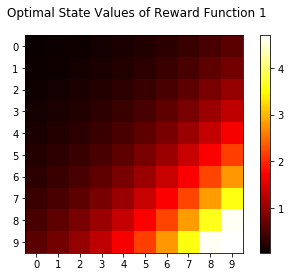

In [0]:
from IPython.display import display
# Question 3
def values_list_1d_to_2d(vals):
    """
    Convert a 1D value list (indexed by state ID) into a 2D list
    """
    vals_row = []
    for row in range(0, 10):
        vals_col = []
        for col in range(0, 10):
            vals_col.append(vals[col*10+row])
        vals_row.append(vals_col)
    return vals_row


def plot_state_actions_image(state_actions):
    """
    Plot the optimal state actions graph as a concatenation of arrow images
    """
    CELL_SIZE = 100  # width and height in pixels

    left_arrow, right_arrow, up_arrow, down_arrow = Image.open("left-arrow.jpg"), Image.open("right-arrow.jpg"), Image.open("up-arrow.jpg"), Image.open("down-arrow.jpg")
    left_arrow.thumbnail((CELL_SIZE, CELL_SIZE))
    right_arrow.thumbnail((CELL_SIZE, CELL_SIZE))
    up_arrow.thumbnail((CELL_SIZE, CELL_SIZE))
    down_arrow.thumbnail((CELL_SIZE, CELL_SIZE))

    state_actions_im = Image.new('RGB', (CELL_SIZE*10, CELL_SIZE*10))
    for row in range(0, 10):
        for col in range(0, 10):
            #print(row, col)
            if state_actions[row][col] == RLAction.UP:
                state_actions_im.paste(up_arrow, (col*CELL_SIZE, row*CELL_SIZE))
            elif state_actions[row][col] == RLAction.RIGHT:
                state_actions_im.paste(right_arrow, (col*CELL_SIZE, row*CELL_SIZE))
            elif state_actions[row][col] == RLAction.DOWN:
                state_actions_im.paste(down_arrow, (col*CELL_SIZE, row*CELL_SIZE))
            elif state_actions[row][col] == RLAction.LEFT:
                state_actions_im.paste(left_arrow, (col*CELL_SIZE, row*CELL_SIZE))
    display(state_actions_im)

plt.figure(2)
plt.suptitle("Optimal State Values of Reward Function 1")
state_values_heatmap_1 = plt.imshow(np.array(values_list_1d_to_2d(state_values_1)), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(state_values_heatmap_1)
print("Reward Function 1: maximum state value = {0}, minimum state value = {1}".format(
    max([val for val in state_values_1]), min([val for val in state_values_1])))
plt.show()

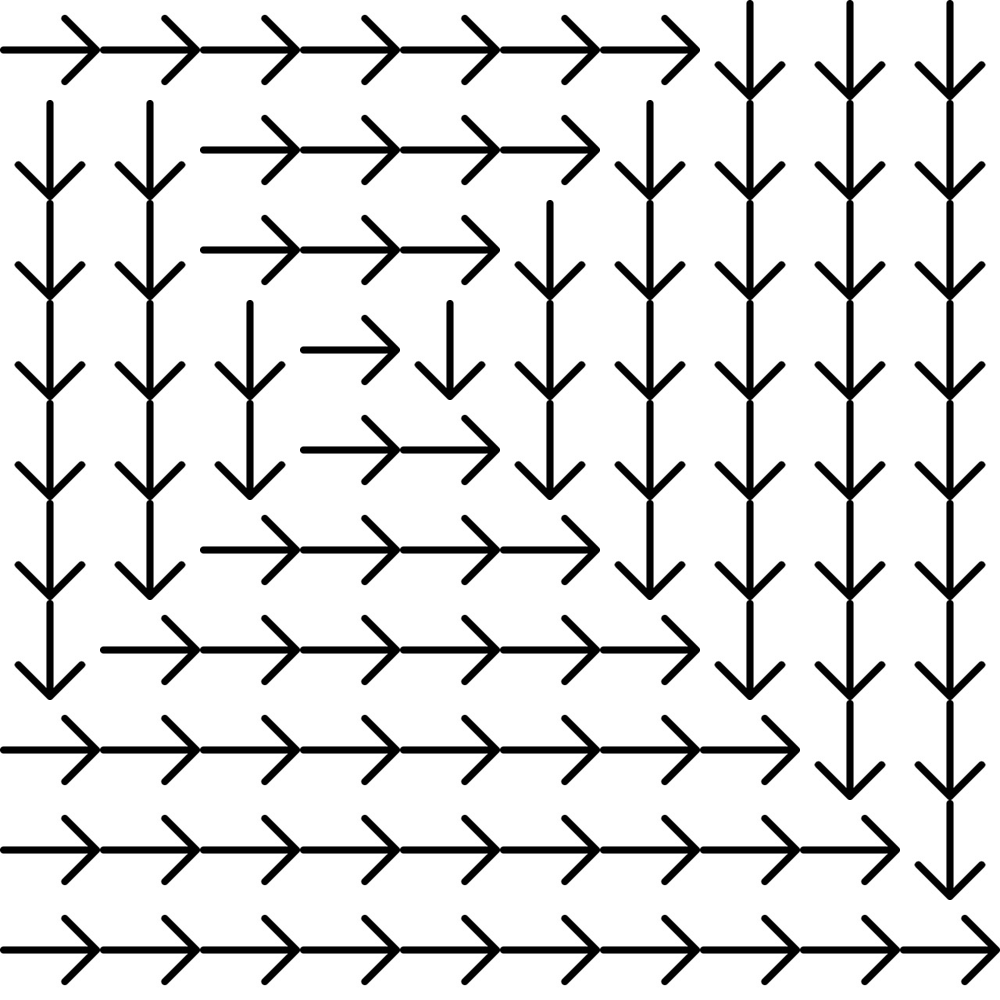

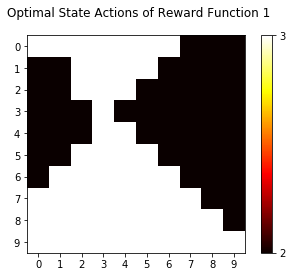

In [0]:
# Question 5
state_actions_1 = valueIteration(transition_prob, reward_func_list_1, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
plot_state_actions_image(values_list_1d_to_2d(state_actions_1))

plt.figure(4)
plt.suptitle("Optimal State Actions of Reward Function 1")
state_actions_heatmap_1 = plt.imshow(
    np.array(values_list_1d_to_2d(list(map(lambda x: x.value, state_actions_1)))),
    cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(state_actions_heatmap_1, ticks=[0, 1, 2, 3])
plt.show()

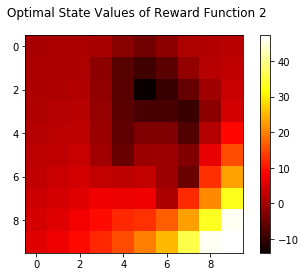

In [0]:
# Question 6
state_values_2 = valueIteration(transition_prob, reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, False)

# Question 7
plt.figure(3)
plt.suptitle("Optimal State Values of Reward Function 2")
state_values_heatmap_2 = plt.imshow(np.array(values_list_1d_to_2d(state_values_2)), cmap="hot", interpolation='nearest')
plt.colorbar(state_values_heatmap_2)
plt.show()

In [0]:
# Question 8

from random import sample

def get_trans_matrix(state_actions, w=0.1):
    trans_matrix = np.zeros((len(state_actions), len(state_actions)))

    rl_states = []
    for row in range(0, 10):
        for col in range(0, 10):
            rl_states.append(RLState((row, col)))

    for s in rl_states:
        s_id = _get_state_id(s)
        action = state_actions[s_id]
        for s_prime in rl_states:
            s_prime_id = _get_state_id(s_prime)
            trans_matrix[s_id, s_prime_id] = transition_prob(s, s_prime, action, w)
    return trans_matrix

#optimal_trans_matrix = get_trans_matrix(state_actions_1)

def get_non_optimal_trans_matricies(optimal_state_actions, w=0.1):
    actions = set([RLAction.UP, RLAction.DOWN, RLAction.LEFT, RLAction.RIGHT])
    #list of non optimal actions for each state, used to get transition matrices
    non_optimal_actions_list = [sample((actions-set([action])), k=3)
                                for action in optimal_state_actions]
    
    trans_matricies = []
    for i in range(len(non_optimal_actions_list[0])):
        actions = [non_optimal_actions[i] for non_optimal_actions in non_optimal_actions_list]
        trans_matricies.append(get_trans_matrix(actions, w))
    return trans_matricies

#should be length 3 or (num of actions-1)
#non_optimal_trans_matricies = get_non_optimal_trans_matricies(state_actions_1)

In [0]:
def build_D_matrix(optimal_trans_matrix, non_optimal_trans_matricies, discount):
    D_mat_rows = []
    num_states = optimal_trans_matrix.shape[0]
    size_states = (num_states,num_states)

    # first 3|S| rows of D
    for nopt_trans_matrix in non_optimal_trans_matricies:
        P_diff = optimal_trans_matrix - nopt_trans_matrix
        identity_diff = np.identity(num_states) - discount * optimal_trans_matrix
        product = -np.dot(P_diff, np.linalg.inv(identity_diff))
        row = np.concatenate((product, np.identity(num_states), np.zeros(size_states)), axis=1)
        D_mat_rows.append(row)

    # second 3|S| rows of D    
    for nopt_trans_matrix in non_optimal_trans_matricies:
        P_diff = optimal_trans_matrix - nopt_trans_matrix
        identity_diff = np.identity(num_states) - discount * optimal_trans_matrix
        product = -np.dot(P_diff, np.linalg.inv(identity_diff))
        row = np.concatenate((product, np.zeros(size_states), np.zeros(size_states)), axis=1)
        #print(row)
        D_mat_rows.append(row)

    # for -u <= R <= u 
    D_mat_rows.append(np.concatenate((np.identity(num_states), np.zeros(size_states), -np.identity(num_states)), axis=1))
    D_mat_rows.append(np.concatenate((-np.identity(num_states), np.zeros(size_states), -np.identity(num_states)), axis=1))

    # for -Rmax <= Ri <= Rmax 
    D_mat_rows.append(np.concatenate((np.identity(num_states), np.zeros(size_states), np.zeros(size_states)), axis=1))
    D_mat_rows.append(np.concatenate((-np.identity(num_states), np.zeros(size_states), np.zeros(size_states)), axis=1))

    # 1000 by 300 maxtrix
    D_mat = np.concatenate(D_mat_rows, axis=0)
    return D_mat

def build_h_vec(num_states, Rmax):
    #1000 by 1 vector
    return np.concatenate((np.zeros((8*num_states)), Rmax*np.ones((2*num_states))))

def build_c_vec(num_states, penalty):
    #300 by 1 vector... -c because cvxopt solves minimum but we want maximum
    c = np.concatenate((np.zeros((num_states)), np.ones((num_states)), -penalty*np.ones((num_states))))
    return -c

In [0]:
from cvxopt import solvers, matrix
solvers.options['show_progress'] = False

def solve_lp(optimal_trans_matrix, non_optimal_trans_matricies, discount, Rmax, penalty):
    """solves the linear programming problem in spec and returns a numpy array of the reward function"""
    
    num_states = optimal_trans_matrix.shape[0]
    
    c = matrix(build_c_vec(num_states, penalty))
    G = matrix(build_D_matrix(optimal_trans_matrix, non_optimal_trans_matricies, discount))
    h = matrix(build_h_vec(num_states, Rmax))
    sol = np.array(solvers.lp(c, G, h)['x'])[:num_states]
    return np.reshape(sol, (10,10), order='F')

def action_accuracy(real_optimal_actions, IRL_optimal_actions):
    count = 0
    for expert, agent in zip(real_optimal_actions, IRL_optimal_actions):
        if expert == agent:
            count +=1
    return count / len(real_optimal_actions)

In [0]:
from tqdm import tqdm_notebook

def get_accuracies(optimal_actions, penalty_iterator, Rmax):
    '''gets accuracies for the IRL algorithm across all penalties specified in penalty_iterator'''
    optimal_trans_matrix = get_trans_matrix(optimal_actions)
    #should be length 3 or (num of actions-1)
    non_optimal_trans_matricies = get_non_optimal_trans_matricies(optimal_actions)
    rl_states = []
    for row in range(0, 10):
        for col in range(0, 10):
            rl_states.append(RLState((row, col)))
    rl_actions = [RLAction.UP, RLAction.RIGHT, RLAction.DOWN, RLAction.LEFT]

    # list of optimal actions from reward functions from IRL (500 total)
    IRL_optimal_actions = []
    IRL_reward_funcs = []
    for penalty in tqdm_notebook(penalty_iterator):
        ret = solve_lp(optimal_trans_matrix, non_optimal_trans_matricies, discount=0.8, Rmax=Rmax, penalty=penalty)
        IRL_reward_funcs.append(ret)
        IRL_reward_func_list = np.ndarray.tolist(ret)
        IRL_optimal_action = valueIteration(transition_prob, IRL_reward_func_list, rl_states, rl_actions, discount=0.8, eps=0.01, w=0.1, do_computation=True)
        IRL_optimal_actions.append(IRL_optimal_action)
    
    accuracies = [action_accuracy(optimal_actions, agent_actions) for agent_actions in IRL_optimal_actions]
    return accuracies, IRL_reward_funcs

In [0]:
import pickle
import os

os.getcwd()
exists = os.path.isfile(os.path.join(os.getcwd(), 'accuracies_reward_funcs_1.pickle'))
penalty_sweep = [i/100 for i in range(501)]

if exists:
    accuracies, reward_funcs = pickle.load(open('accuracies_reward_funcs_1.pickle', 'rb'))
else:
    state_actions_1 = valueIteration(transition_prob, reward_func_list_1, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
    accuracies, reward_funcs = get_accuracies(state_actions_1, penalty_sweep, Rmax=1)
    pickle.dump((accuracies, reward_funcs), open('accuracies_reward_funcs_1.pickle', 'wb')) 


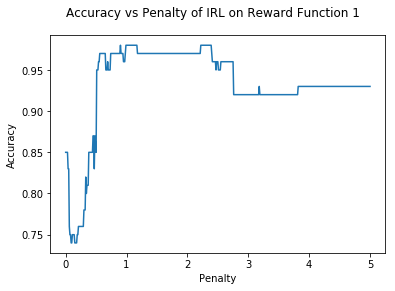

In [0]:
# Question 11
plt.figure(4)
plt.suptitle("Accuracy vs Penalty of IRL on Reward Function 1")
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.plot(penalty_sweep, accuracies)
plt.show()

In [0]:
# Question 12
max_ind = accuracies.index(max(accuracies))
max_penalty = penalty_sweep[max_ind]
print("max accuracy: {}".format(max(accuracies)))
print("occurs at penalty={}".format(max_penalty))

max accuracy: 0.98
occurs at penalty=0.9


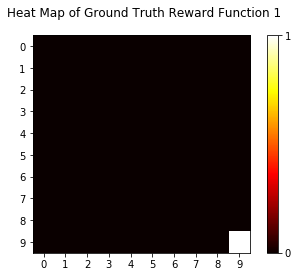

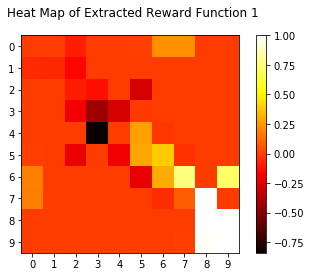

       0      1      2      3      4      5      6      7      8      9
0 -0.000 -0.000 -0.082 -0.000  0.000  0.005  0.231  0.224 -0.005 -0.000
1 -0.055 -0.057 -0.157 -0.001 -0.000 -0.000  0.000 -0.000 -0.000  0.000
2 -0.000 -0.000 -0.092 -0.125 -0.000 -0.278  0.000 -0.000 -0.000 -0.000
3 -0.000 -0.000 -0.197 -0.432 -0.277 -0.011 -0.000 -0.000 -0.000 -0.000
4  0.000 -0.000 -0.000 -0.840  0.000  0.270 -0.015 -0.000 -0.000  0.000
5  0.004 -0.000 -0.222 -0.000 -0.203  0.285  0.391 -0.032 -0.000  0.000
6  0.183 -0.000 -0.000 -0.000  0.000 -0.233  0.308  0.769 -0.000  0.717
7  0.177 -0.000 -0.000 -0.000 -0.000 -0.000 -0.043  0.091  1.000  0.000
8 -0.004 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000  1.000  1.000
9 -0.000  0.000 -0.000 -0.000 -0.000 -0.000  0.000  0.001  0.983  1.000


In [0]:
import pandas as pd
# Question 13
best_extracted_reward_func = reward_funcs[max_ind]
plt.figure(5)
plt.suptitle("Heat Map of Ground Truth Reward Function 1")
heatmap_1 = plt.imshow(np.array(reward_func_list_1), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(heatmap_1, ticks=[0, 1])

plt.figure(6)
plt.suptitle("Heat Map of Extracted Reward Function 1")
extracted_reward_heatmap_1 = plt.imshow(best_extracted_reward_func, cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(extracted_reward_heatmap_1)
plt.show()

print(pd.DataFrame(best_extracted_reward_func).round(3))


Extracted Reward Function: maximum state value = 4.983432658868844, minimum state value = 0.24897768337553194
Extracted State Values of Reward Function 1
       0      1      2      3      4      5      6      7      8      9
0  0.249  0.319  0.516  0.671  0.863  1.098  1.115  1.124  1.114  1.108
1  0.319  0.316  0.513  0.672  0.867  1.104  1.404  1.416  1.410  1.410
2  0.414  0.410  0.525  0.840  1.095  1.752  1.793  1.801  1.802  1.802
3  0.533  0.530  0.659  1.072  1.749  2.276  2.301  2.301  2.301  2.301
4  0.682  0.684  0.855  1.735  2.262  2.602  2.960  2.939  2.939  2.939
5  0.868  0.872  1.387  1.792  2.580  2.961  3.292  3.793  3.753  3.753
6  0.882  1.110  1.418  1.821  2.327  3.264  3.795  3.884  4.792  3.897
7  0.888  1.120  1.425  1.822  2.327  2.972  3.849  4.794  4.867  4.908
8  0.881  1.115  1.425  1.822  2.327  2.972  3.795  4.846  4.934  4.957
9  0.876  1.115  1.425  1.822  2.327  2.972  3.795  4.844  4.955  4.983


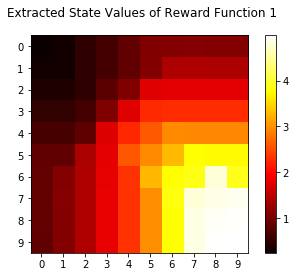

In [0]:
# Question 14
rl_states = []
for row in range(0, 10):
    for col in range(0, 10):
        rl_states.append(RLState((row, col)))
rl_actions = [RLAction.UP, RLAction.RIGHT, RLAction.DOWN, RLAction.LEFT]

extracted_reward_func_list = np.ndarray.tolist(best_extracted_reward_func)
extracted_state_values = valueIteration(transition_prob, extracted_reward_func_list, rl_states, rl_actions, 0.8, 0.01, 0.1, False)


plt.figure(7)
plt.suptitle("Extracted State Values of Reward Function 1")
extracted_state_values_heatmap = plt.imshow(np.array(values_list_1d_to_2d(extracted_state_values)), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(extracted_state_values_heatmap)
print("Extracted Reward Function: maximum state value = {0}, minimum state value = {1}".format(
    max([val for val in extracted_state_values]), min([val for val in extracted_state_values])))
print("Extracted State Values of Reward Function 1")
print(pd.DataFrame(values_list_1d_to_2d(extracted_state_values)).round(3))
plt.show()

In [0]:
# Question 15 See Report
# Question 16
extracted_optimal_actions = valueIteration(transition_prob, extracted_reward_func_list, rl_states, rl_actions, discount=0.8, eps=0.01, w=0.1, do_computation=True)
#plot_state_actions_image(values_list_1d_to_2d(extracted_optimal_actions))
# Question 17 See Report

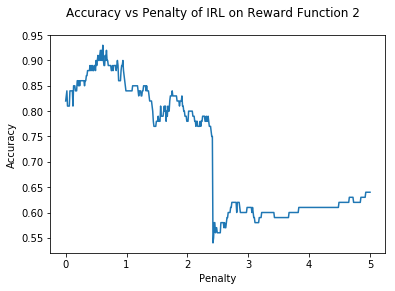

In [0]:
# Question 18
exists = os.path.isfile(os.path.join(os.getcwd(), 'accuracies_reward_funcs_2.pickle'))
penalty_sweep = [i/100 for i in range(501)]

if exists:
    accuracies_2, reward_funcs_2 = pickle.load(open('accuracies_reward_funcs_2.pickle', 'rb'))
else:
    state_actions_2 = valueIteration(transition_prob, reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
    accuracies_2, reward_funcs_2 = get_accuracies(state_actions_2, penalty_sweep, Rmax=100)
    pickle.dump((accuracies_2, reward_funcs_2), open('accuracies_reward_funcs_2.pickle', 'wb')) 

plt.figure(7)
plt.suptitle("Accuracy vs Penalty of IRL on Reward Function 2")
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.plot(penalty_sweep, accuracies_2)
plt.show()

In [0]:
# Question 19
max_ind_2 = accuracies_2.index(max(accuracies_2))
max_penalty_2 = penalty_sweep[max_ind_2]
print("max accuracy: {}".format(max(accuracies_2)))
print("occurs at penalty={}".format(max_penalty_2))
print("number of results with accuracy 0.90 or above: {}".format(sum([1 for a in accuracies_2 if a >= 0.90])))

max accuracy: 0.93
occurs at penalty=0.61
number of results with accuracy 0.90 or above: 19


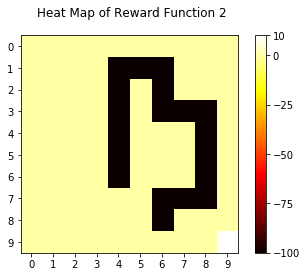

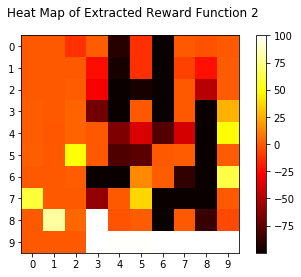

Extracted Reward Function 2
      0     1     2      3      4     5      6      7      8      9
0  -0.0  -0.0 -11.7    0.0  -91.0 -13.0 -100.0   -0.5   -3.1   -0.0
1  -0.0  -0.3  -0.0  -23.1  -95.8 -12.7 -100.0   -7.1  -22.5    0.0
2   0.0  -0.5   0.0  -29.5 -100.0 -95.3 -100.0    0.0  -48.1    0.0
3   0.0  -0.6   2.7  -68.5 -100.0  -0.0 -100.0   -0.0 -100.0   26.2
4   0.0  -0.8   2.6   -0.0  -65.5 -38.1  -77.7  -39.8 -100.0   48.9
5   1.0  -0.0  50.2   -0.0  -79.1 -75.5   -0.0    0.0 -100.0    0.0
6  -0.0  -0.0   0.0 -100.0 -100.0  14.1    0.0  -87.6 -100.0   63.1
7  60.8   0.0  -0.0  -58.7   -0.0  36.9 -100.0 -100.0 -100.0   -0.0
8  -0.0  80.9   3.5  100.0   -1.9   0.0 -100.0   -0.0  -85.8   -5.4
9  -0.0   0.0  -0.0   99.2   99.1  99.2  100.0   99.6  100.0  100.0


In [0]:
# Question 20

best_extracted_reward_func_2 = reward_funcs_2[max_ind_2]

plt.figure(8)
plt.suptitle("Heat Map of Reward Function 2")
heatmap_2 = plt.imshow(np.array(reward_func_list_2), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(heatmap_2, ticks=[-100, -75, -50, -25, 0, 10])


plt.figure(9)
plt.suptitle("Heat Map of Extracted Reward Function 2")
extracted_reward_heatmap_2 = plt.imshow(best_extracted_reward_func_2, cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(extracted_reward_heatmap_2)
plt.show()
print("Extracted Reward Function 2")
print(pd.DataFrame(best_extracted_reward_func_2).round(1))


Extracted Reward Function: maximum state value = 485.6082018553225, minimum state value = -65.1639013087718


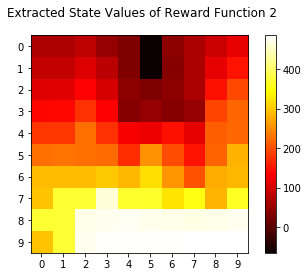

Extracted State Values of Reward Function 2
       0      1      2      3      4      5      6      7      8      9
0   68.3   68.3   83.0   51.0   32.7  -64.8   44.0   66.8   92.9  119.0
1   86.7   87.2  107.0   79.8   32.8  -65.2   38.1   66.8  117.2  152.0
2  110.7  111.3  139.1  103.3   44.0   32.2   44.0   66.5  149.2  195.6
3  141.3  142.0  176.9  136.5   38.1   50.1   38.1   50.1  191.5  219.9
4  180.3  181.3  226.7  176.7  132.0  122.4  148.0  116.3  214.1  222.1
5  228.8  230.0  229.1  224.6  173.6  255.7  198.6  152.0  217.4  283.2
6  291.9  291.9  291.1  301.7  286.3  318.5  258.5  202.0  277.0  286.1
7  296.4  372.5  372.8  462.9  371.0  368.5  323.6  356.2  285.0  364.9
8  372.6  374.1  470.9  475.6  477.7  473.5  471.6  469.1  472.2  475.8
9  296.6  374.7  475.3  482.5  482.6  482.5  481.5  484.0  483.5  485.6


In [0]:
# Question 21
extracted_reward_func_list_2 = np.ndarray.tolist(best_extracted_reward_func_2)
extracted_state_values_2 = valueIteration(transition_prob, extracted_reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, False)


plt.figure(10)
plt.suptitle("Extracted State Values of Reward Function 2")
extracted_state_values_heatmap_2 = plt.imshow(np.array(values_list_1d_to_2d(extracted_state_values_2)), cmap="hot", interpolation='nearest')
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.colorbar(extracted_state_values_heatmap_2)
print("Extracted Reward Function: maximum state value = {0}, minimum state value = {1}".format(
    max([val for val in extracted_state_values_2]), min([val for val in extracted_state_values_2])))
plt.show()
print("Extracted State Values of Reward Function 2")
print(pd.DataFrame(values_list_1d_to_2d(extracted_state_values_2)).round(1))


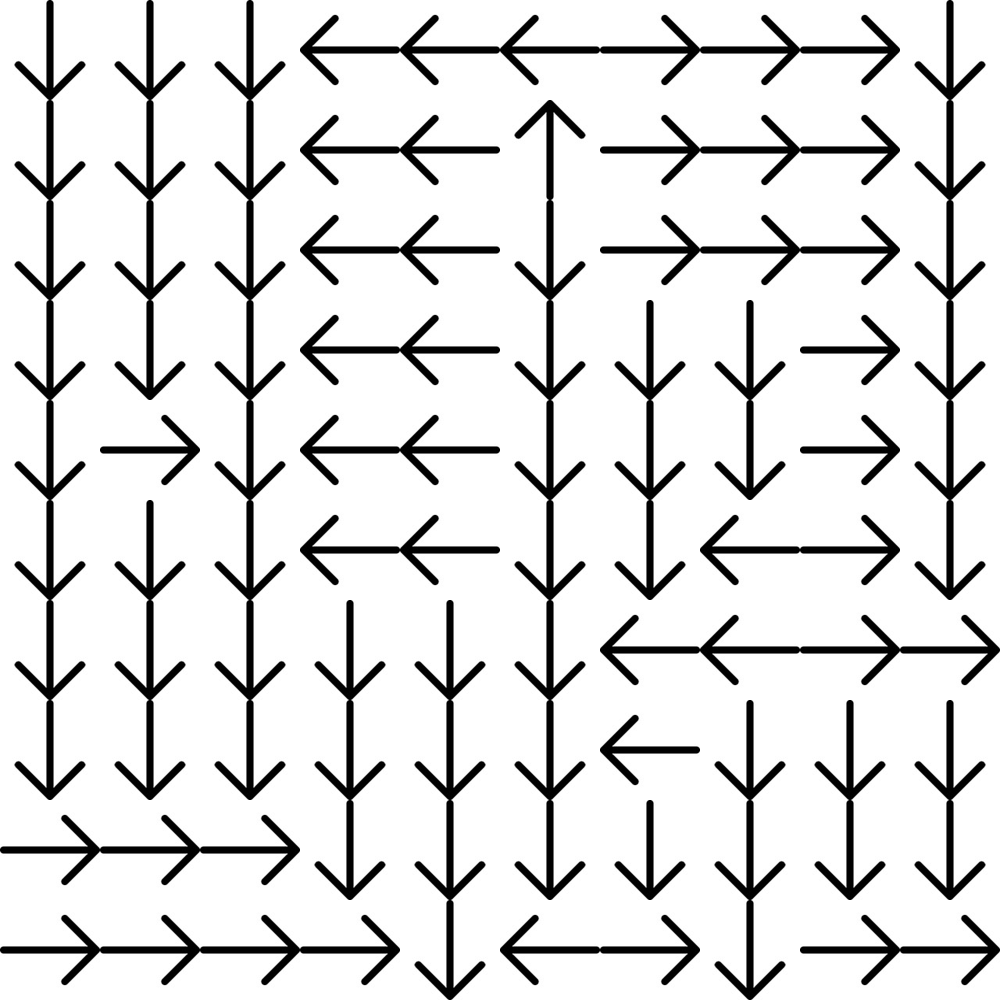

In [0]:
# Question 22 See Report
# Question 23
extracted_optimal_actions_2 = valueIteration(transition_prob, extracted_reward_func_list_2, rl_states, rl_actions, discount=0.8, eps=0.01, w=0.1, do_computation=True)
plot_state_actions_image(values_list_1d_to_2d(extracted_optimal_actions_2))

In [0]:
# 25 eps fix
exists = os.path.isfile(os.path.join(os.getcwd(), 'accuracies_smaller_eps.pickle'))
if exists:
    smaller_eps_actions = pickle.load(open('accuracies_smaller_eps.pickle', 'rb'))
else:
    state_actions_2 = valueIteration(transition_prob, reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
    smaller_eps_actions = []
    for reward_function in tqdm_notebook(reward_funcs_2):
        reward_func_list = np.ndarray.tolist(reward_function)
        state_values = valueIteration(transition_prob, reward_func_list, rl_states, rl_actions, discount=0.8, eps=0.00001, w=0.1, do_computation=True)
        smaller_eps_actions.append(state_values)
        
    pickle.dump(smaller_eps_actions, open('accuracies_smaller_eps.pickle', 'wb')) 

state_actions_2 = valueIteration(transition_prob, reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
accuracies_smaller_eps = [action_accuracy(state_actions_2, agent_actions) for agent_actions in smaller_eps_actions]

max accuracy: 0.97
occurs at penalty=0.53


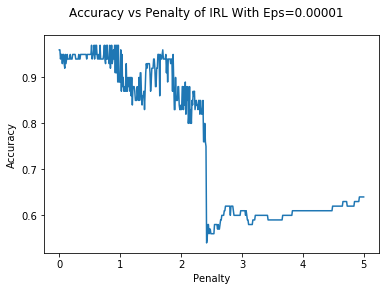

number of results with accuracy 0.90 or above: 148


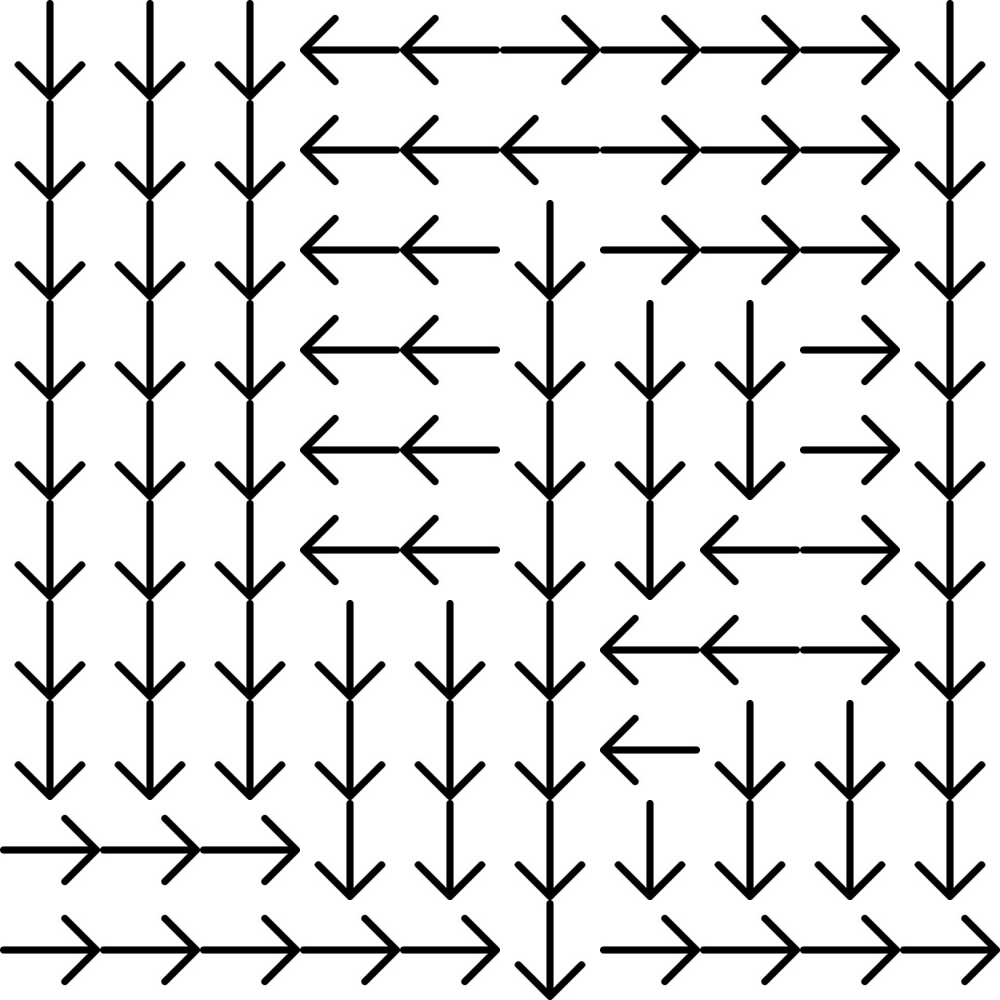

In [0]:
max_ind = accuracies_smaller_eps.index(max(accuracies_smaller_eps))
max_penalty = max_ind/100
print("max accuracy: {}".format(max(accuracies_smaller_eps)))
print("occurs at penalty={}".format(max_penalty))

plt.figure(11)
plt.suptitle("Accuracy vs Penalty of IRL With Eps=0.00001")
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.plot(penalty_sweep, accuracies_smaller_eps)
plt.show()
print("number of results with accuracy 0.90 or above: {}".format(sum([1 for a in accuracies_smaller_eps if a >= 0.90])))
plot_state_actions_image(values_list_1d_to_2d(smaller_eps_actions[max_ind]))

In [0]:
# 25 Rmin fix

def build_h_vec_Rmin(num_states, Rmax, Rmin):
    #1000 by 1 vect`or
    return np.concatenate((np.zeros((8*num_states)), Rmax*np.ones((num_states)), -Rmin*np.ones(num_states)))


def solve_lp_Rmin(optimal_trans_matrix, non_optimal_trans_matricies, discount, Rmax, Rmin, penalty):
    """solves the linear programming problem in spec and returns a numpy array of the reward function"""
    
    num_states = optimal_trans_matrix.shape[0]
    
    c = matrix(build_c_vec(num_states, penalty))
    G = matrix(build_D_matrix(optimal_trans_matrix, non_optimal_trans_matricies, discount))
    h = matrix(build_h_vec_Rmin(num_states, Rmax, Rmin))
    sol = np.array(solvers.lp(c, G, h)['x'])[:num_states]
    return np.reshape(sol, (10,10), order='F')


def get_accuracies_Rmin(optimal_actions, penalty_iterator, Rmax, Rmin, eps=0.01):
    '''gets accuracies for the IRL algorithm across all penalties specified in penalty_iterator'''
    optimal_trans_matrix = get_trans_matrix(optimal_actions)
    #should be length 3 or (num of actions-1)
    non_optimal_trans_matricies = get_non_optimal_trans_matricies(optimal_actions)
    rl_states = []
    for row in range(0, 10):
        for col in range(0, 10):
            rl_states.append(RLState((row, col)))
    rl_actions = [RLAction.UP, RLAction.RIGHT, RLAction.DOWN, RLAction.LEFT]

    # list of optimal actions from reward functions from IRL (500 total)
    IRL_optimal_actions = []
    IRL_reward_funcs = []
    for penalty in tqdm_notebook(penalty_iterator):
        ret = solve_lp_Rmin(optimal_trans_matrix, non_optimal_trans_matricies, discount=0.8, Rmax=Rmax, Rmin=Rmin, penalty=penalty)
        IRL_reward_funcs.append(ret)
        IRL_reward_func_list = np.ndarray.tolist(ret)
        IRL_optimal_action = valueIteration(transition_prob, IRL_reward_func_list, rl_states, rl_actions, discount=0.8, eps=eps, w=0.1, do_computation=True)
        IRL_optimal_actions.append(IRL_optimal_action)
    
    accuracies = [action_accuracy(optimal_actions, agent_actions) for agent_actions in IRL_optimal_actions]
    return accuracies, IRL_reward_funcs

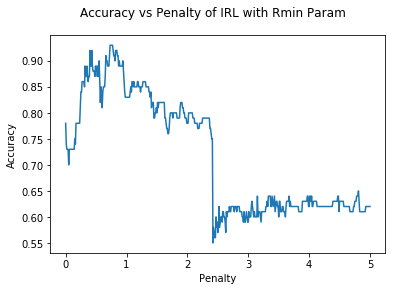

In [0]:
exists = os.path.isfile(os.path.join(os.getcwd(), 'accuracies_reward_funcs_2_Rmin.pickle'))
penalty_sweep = [i/100 for i in range(501)]

if exists:
    accuracies_Rmin, reward_funcs_Rmin = pickle.load(open('accuracies_reward_funcs_2_Rmin.pickle', 'rb'))
else:
    state_actions_2 = valueIteration(transition_prob, reward_func_list_2, rl_states, rl_actions, 0.8, 0.01, 0.1, True)
    accuracies_Rmin, reward_funcs_Rmin = get_accuracies_Rmin(state_actions_2, penalty_sweep, Rmax=10, Rmin=-100)
    pickle.dump((accuracies_Rmin, reward_funcs_Rmin), open('accuracies_reward_funcs_2_Rmin.pickle', 'wb')) 

plt.figure(10)
plt.suptitle("Accuracy vs Penalty of IRL with Rmin Param")
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.plot(penalty_sweep, accuracies_Rmin)
plt.show()